## <center> CNN - Flower Power III </center>

#### Brown Knapweed, Buttercup(Creeping & Meadow), Chamomile, Common Dandelion,  Common Poppy, Cornflower, Cow Parsley, Cuckooflower, Field Mouse-ear, Flatweed, Hare's-foot clover, Health Spotted Orchid, Hoary Alyssum, Marsh Lousewort, Marsh marigold, Meadow Thistle, Ox-eye Daisy, Red Clover, Southern Marsh Orchid and White Clover

In [1]:
import os
import cv2
import numpy as np

x = [] # Feature dataset with images
y = [] # Target dataset with labels


folder_dir = './Flower-Data_CNN'
size = 128 #Crop the image to 128x128
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("JPG"):
            y.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (size,size))
            x.append(im)
        else:
            continue

In [2]:
# split the dataset into 80% training and 20% test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [3]:
# take a look at one of the images:
X_train[0]

array([[[ 41,  43,  32],
        [ 42,  42,  34],
        [ 51,  49,  42],
        ...,
        [110, 110,  99],
        [133, 127, 118],
        [141, 135, 128]],

       [[ 52,  58,  49],
        [ 41,  44,  37],
        [ 51,  51,  45],
        ...,
        [ 87,  95,  81],
        [ 96, 100,  81],
        [114, 110,  95]],

       [[ 56,  65,  54],
        [ 36,  41,  33],
        [ 41,  43,  36],
        ...,
        [ 95, 106,  99],
        [ 96, 105,  95],
        [ 93, 100,  87]],

       ...,

       [[163, 164, 166],
        [182, 184, 186],
        [178, 180, 184],
        ...,
        [208, 206, 192],
        [180, 184, 157],
        [164, 172, 121]],

       [[243, 244, 246],
        [244, 245, 247],
        [240, 244, 245],
        ...,
        [203, 207, 188],
        [157, 165, 119],
        [166, 175, 115]],

       [[244, 243, 248],
        [245, 246, 250],
        [238, 239, 243],
        ...,
        [150, 157, 117],
        [162, 171, 113],
        [168, 172, 119]]

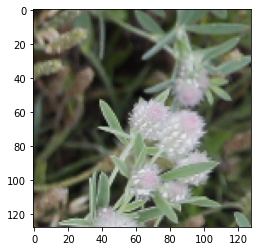

In [4]:
# Show the image
import matplotlib.pyplot as plt
img = plt.imshow(X_train[1])

In [5]:
# Print the label of the image above:
y_train[1]

"Hare's-foot clover"

In [6]:
# Convert all the labels in numerical values
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [7]:
y_train

array([ 6, 10,  7, ...,  8,  2,  7], dtype=int64)

In [8]:
import tensorflow as tf
y_train_one_hot = tf.one_hot(y_train, depth=20)
y_test_one_hot = tf.one_hot(y_test, depth=20)
y_train_one_hot

<tf.Tensor: shape=(2440, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [9]:
# Normalize the pixels in the images to be values between 0 and 1
X_train = np.array(X_train)/255
X_test= np.array(X_test)/255
X_train

array([[[[0.16078431, 0.16862745, 0.1254902 ],
         [0.16470588, 0.16470588, 0.13333333],
         [0.2       , 0.19215686, 0.16470588],
         ...,
         [0.43137255, 0.43137255, 0.38823529],
         [0.52156863, 0.49803922, 0.4627451 ],
         [0.55294118, 0.52941176, 0.50196078]],

        [[0.20392157, 0.22745098, 0.19215686],
         [0.16078431, 0.17254902, 0.14509804],
         [0.2       , 0.2       , 0.17647059],
         ...,
         [0.34117647, 0.37254902, 0.31764706],
         [0.37647059, 0.39215686, 0.31764706],
         [0.44705882, 0.43137255, 0.37254902]],

        [[0.21960784, 0.25490196, 0.21176471],
         [0.14117647, 0.16078431, 0.12941176],
         [0.16078431, 0.16862745, 0.14117647],
         ...,
         [0.37254902, 0.41568627, 0.38823529],
         [0.37647059, 0.41176471, 0.37254902],
         [0.36470588, 0.39215686, 0.34117647]],

        ...,

        [[0.63921569, 0.64313725, 0.65098039],
         [0.71372549, 0.72156863, 0.72941176]

## Create and build the model

In [10]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [11]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(20, activation = "softmax"))

In [12]:
# Adding a learning rate
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [13]:
# compile 
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size= 32 #64
epochs= 100 #maybe epochs 128
history = model.fit(X_train,y_train_one_hot, batch_size=batch_size,
                              epochs = epochs,
                              validation_split=0.3,
                              verbose = 1)

Epoch 1/100
54/54 [==============================] - 96s 2s/step - loss: 2.9499 - accuracy: 0.0785 - val_loss: 2.8397 - val_accuracy: 0.1134
Epoch 2/100
54/54 [==============================] - 95s 2s/step - loss: 2.7393 - accuracy: 0.1253 - val_loss: 2.5306 - val_accuracy: 0.2213
Epoch 3/100
54/54 [==============================] - 95s 2s/step - loss: 2.5908 - accuracy: 0.1604 - val_loss: 2.3118 - val_accuracy: 0.3443
Epoch 4/100
54/54 [==============================] - 95s 2s/step - loss: 2.3864 - accuracy: 0.2395 - val_loss: 2.0940 - val_accuracy: 0.3784
Epoch 5/100
54/54 [==============================] - 96s 2s/step - loss: 2.2599 - accuracy: 0.2740 - val_loss: 1.8992 - val_accuracy: 0.4481
Epoch 6/100
54/54 [==============================] - 96s 2s/step - loss: 2.1351 - accuracy: 0.3068 - val_loss: 1.8122 - val_accuracy: 0.5164
Epoch 7/100
54/54 [==============================] - 95s 2s/step - loss: 2.0042 - accuracy: 0.3489 - val_loss: 1.5978 - val_accuracy: 0.5601
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 91s 2s/step - loss: 0.5134 - accuracy: 0.8121 - val_loss: 0.7743 - val_accuracy: 0.8265
Epoch 60/100
54/54 [==============================] - 91s 2s/step - loss: 0.4891 - accuracy: 0.8179 - val_loss: 0.7705 - val_accuracy: 0.8210
Epoch 61/100
54/54 [==============================] - 91s 2s/step - loss: 0.4793 - accuracy: 0.8208 - val_loss: 0.7263 - val_accuracy: 0.8210
Epoch 62/100
54/54 [==============================] - 91s 2s/step - loss: 0.4518 - accuracy: 0.8226 - val_loss: 0.6860 - val_accuracy: 0.8333
Epoch 63/100
54/54 [==============================] - 92s 2s/step - loss: 0.4364 - accuracy: 0.8349 - val_loss: 0.7293 - val_accuracy: 0.8306
Epoch 64/100
54/54 [==============================] - 91s 2s/step - loss: 0.4609 - accuracy: 0.8203 - val_loss: 0.7895 - val_accuracy: 0.8156
Epoch 65/100
54/54 [==============================] - 91s 2s/step - loss: 0.4610 - accuracy: 0.8244 - val_loss: 0.7909 - val_accuracy: 0.8251
Epoch 

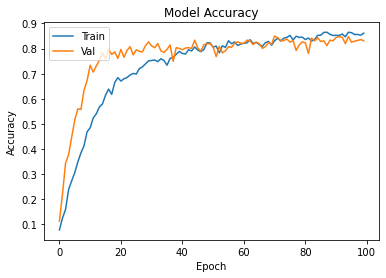

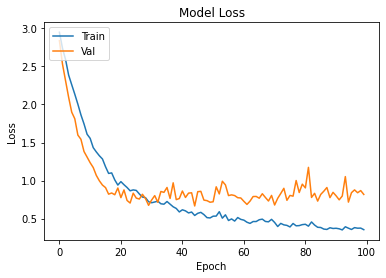

In [14]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [15]:
# Prediction
predict_model = model.predict(np.array(X_train))
predict_model = np.argmax(predict_model, axis=1)
predict_model

array([ 6, 10,  7, ...,  8,  2, 11], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_train, y_pred = predict_model)

In [22]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
cm_plot_labels = ['Brown Knapweed', 'Buttercup(Creeping & Meadow)', 'Chamomile', 'Common Dandelion', 'Common Poppy', 'Cornflower', 'Cow Parsley',
                             'Cuckooflower', 'Field Mouse-ear', 'Flatweed', 'Hares-foot clover', 'Health Spotted Orchid', 'Hoary Alyssum', 'Marsh Lousewort', 
                             'Marsh marigold', 'Meadow Thistle', 'Ox-eye Daisy', 'Red Clover', 'Southern Marsh Orchid', 'White Clover']

Confusion matrix, without normalization
[[103   0   1   0   0   0   1   1   0   0   1   1   0   3   0   4   0   2
    0   1]
 [  0 210   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 126   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0
    0   0]
 [  0   2   2  68   0   0   0   1   0   5   0   1   0   0   2   0   3   0
    0   0]
 [  0   0   0   0  95   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   2   0   0   0 180   8   2   0   0   0   2   1   0   0   0   0
    0   1]
 [  0   0   1   0   0   0   0 153   0   0   0   9   0   1   0   0   0   0
    1   0]
 [  0   0   5   0   0   0   0   0 120   0   0   4   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0 108   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 173   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0

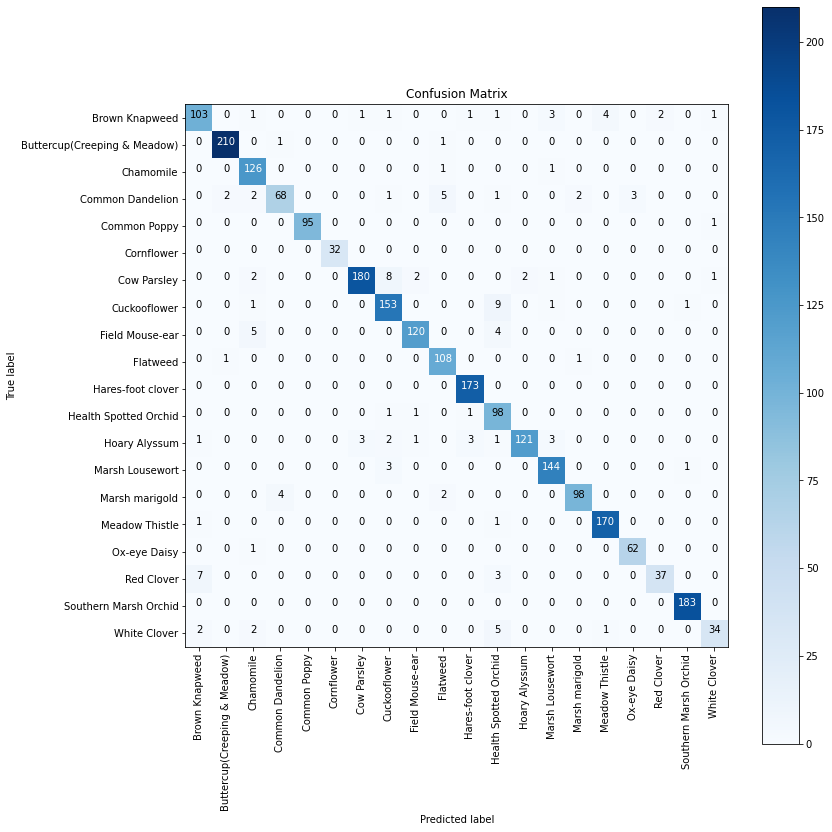

In [23]:
import itertools
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Evaluate the model on the dataset

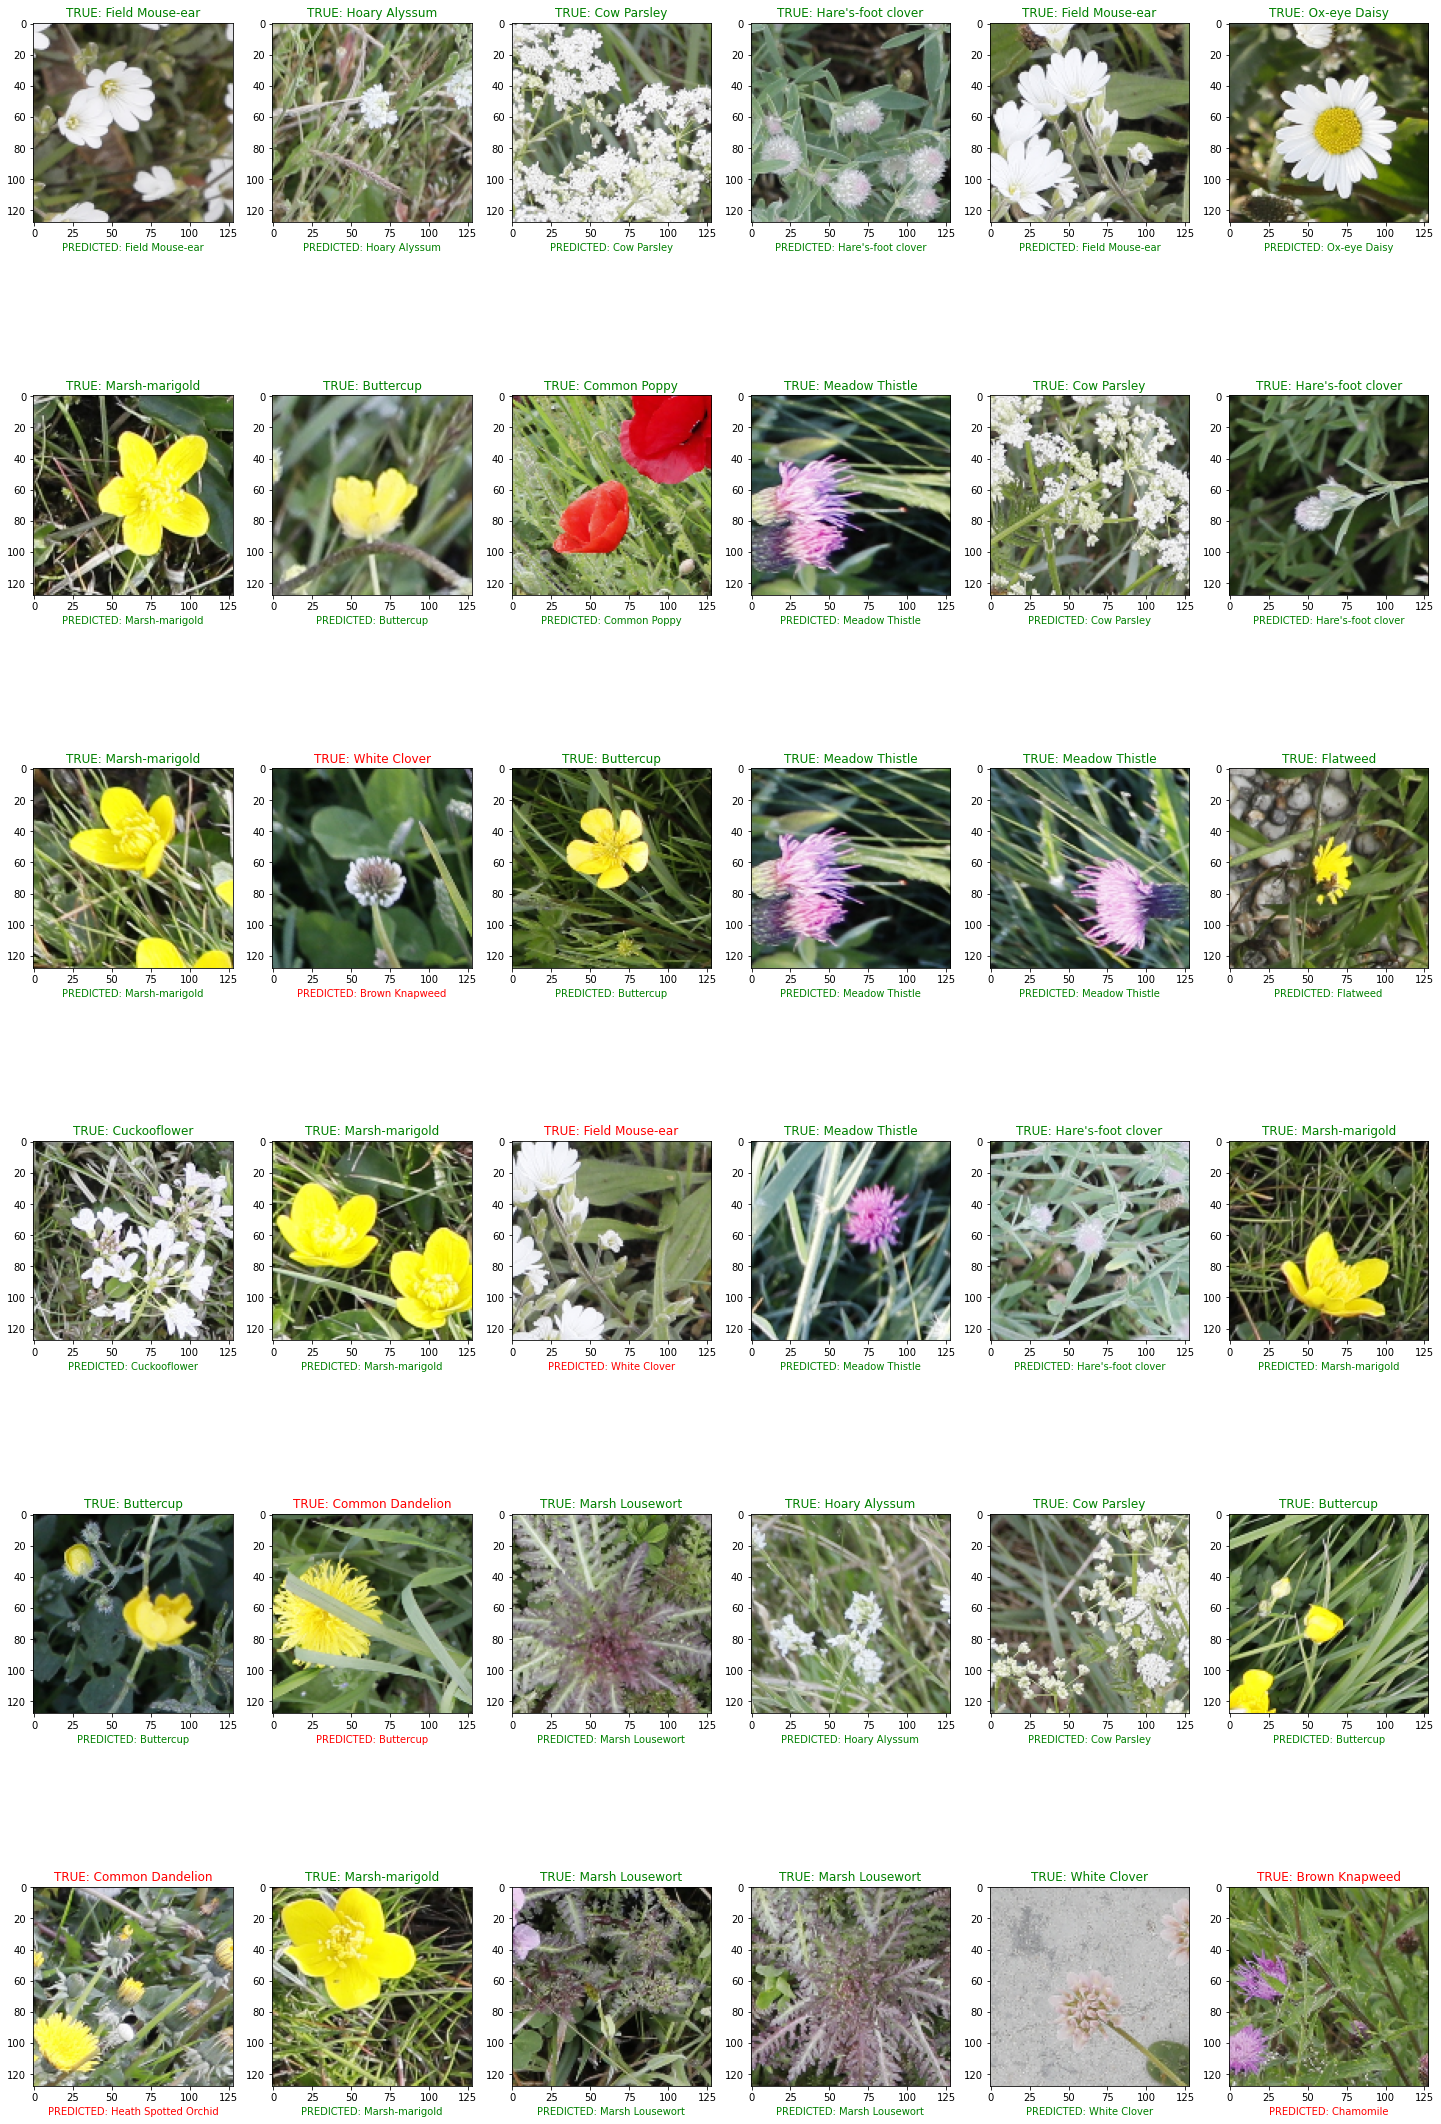

In [24]:
import matplotlib.pyplot as plt
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test_one_hot[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [21]:
y_test[1]

13

### Evaluate the model on 2 new images 

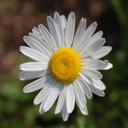

In [92]:
import PIL.Image as Image
SIZE = (128,128)
#insert new Daisy image
new_im = Image.open('Daisy.jpg').resize(SIZE)
new_im

In [93]:
new_im = np.array(new_im)/255
new_im[np.newaxis, ...].shape
result = model.predict(new_im[np.newaxis, ...])
#predict on the new daisy image
predic_label_index = np.argmax(result)
predic_label_index

1

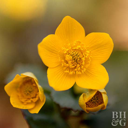

In [94]:
im = Image.open('Marsh.jpg').resize(SIZE)
im

In [95]:
im = np.array(im)/255
im[np.newaxis, ...].shape
result1 = model.predict(im[np.newaxis, ...])
predic_label_index1 = np.argmax(result1)
predic_label_index1

0

Label 0 is for Marsh-marigold and label 1 is for Daisy.